In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS, add_constant
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.6f}'.format})

In [3]:
df = pd.read_csv('./datasets/boston.csv')

In [4]:
df.head(2)

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


In [5]:
df.shape

(506, 13)

In [6]:
features = df.drop(columns=['Median Home Value'])
target = df['Median Home Value']

In [7]:
model = PCA(n_components=features.shape[1])
features_pca = model.fit_transform(features)

In [8]:
features_pca[:5]

array([[-113.002193, 2.867869, 5.226224, -2.276214, -6.359762, -1.029248,
        -5.458417, -1.965709, -0.329180, -0.376816, -0.072840, 0.033906],
       [-164.339238, 30.791377, 1.261191, 0.157293, -3.290283, -0.628297,
        -0.922169, 0.466716, 1.299851, -0.047921, -0.094953, -0.033164],
       [-165.994946, 16.847129, -10.284651, -0.242314, -5.906567,
        1.695048, -0.463067, 0.388631, 0.910989, 0.475788, -0.107795,
        -0.004313],
       [-187.298841, 6.700238, -19.624442, 1.450973, -6.958016,
        -1.997822, -0.806526, 1.033503, 0.964875, 0.287400, -0.054350,
        0.044358],
       [-186.517530, 13.276763, -14.172868, 1.661640, -5.785851,
        -3.074645, -1.018676, 1.044231, 1.123522, 0.545468, -0.055539,
        0.035648]])

In [9]:
model.explained_variance_ratio_

array([0.960041, 0.027388, 0.008893, 0.001726, 0.000936, 0.000536,
       0.000320, 0.000110, 0.000039, 0.000009, 0.000002, 0.000000])

In [10]:
np.sum(model.explained_variance_ratio_)

np.float64(1.0)

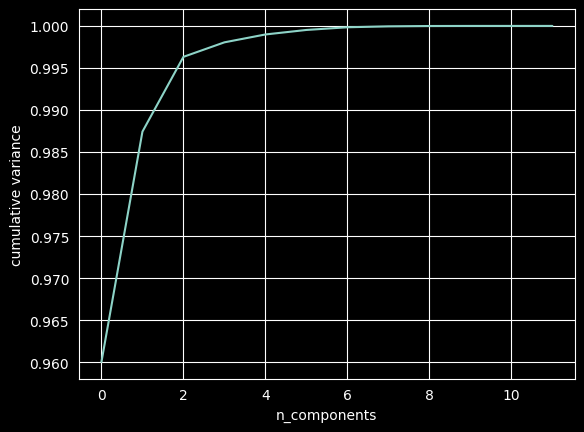

In [11]:
fig, ax = plt.subplots()

ax.plot(np.cumsum(model.explained_variance_ratio_))
ax.set_xlabel('n_components')
ax.set_ylabel('cumulative variance')

plt.show()

In [12]:
def build_model(regression_fn, target, features, n_components, constant):
    X = features
    y = target

    pca = PCA(n_components=n_components)
    X_new = pca.fit_transform(X)
    if constant is True:
        X_new = add_constant(X_new)

    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

    model = regression_fn(X_train, y_train)

    y_pred = model.predict(X_test)

    return {
        'x_initial': X,
        'x_transform': X_new,
        'x_train': X_train,
        'x_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': model,
    }

In [13]:
def ols_reg(X_train, y_train):
    ols = OLS(y_train, X_train)

    model = ols.fit()

    return model

In [14]:
def linear_reg(X_train, y_train):
    linear = LinearRegression().fit(X_train, y_train)

    return linear

In [15]:
ols_result = build_model(ols_reg, target, features, 7, True)

In [16]:
ols_result['x_transform'].shape

(506, 8)

In [17]:
ols_result['x_initial'].shape

(506, 12)

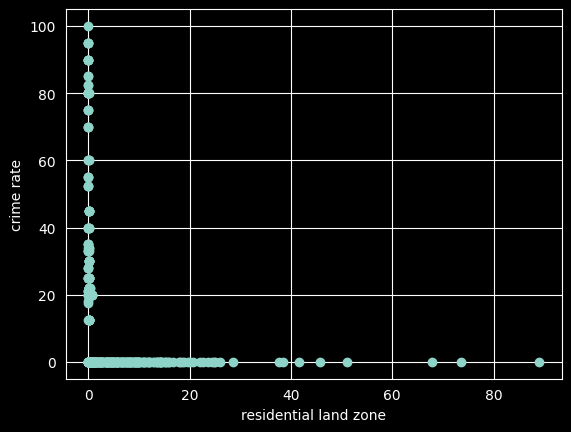

In [18]:
fig, ax = plt.subplots()
ax.scatter(ols_result['x_initial']['crime rate'], ols_result['x_initial']['residential land zone'])

ax.set_xlabel('residential land zone')
ax.set_ylabel('crime rate')
plt.show()

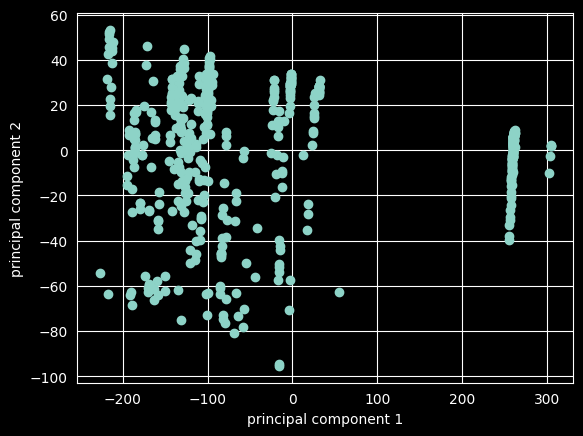

In [19]:
fig, ax = plt.subplots()
ax.scatter(ols_result['x_transform'][:, 1], ols_result['x_transform'][:, 2])

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()